<a href="https://colab.research.google.com/github/AshishPandey88/Doomsday-Glacier-Loss/blob/main/Thwaites_Glacier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from skimage.io import imread, imshow
import numpy as np
from skimage.future import graph
from skimage import segmentation, color, filters,io,data
from matplotlib import pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import os
from skimage.filters import threshold_multiotsu

In [ ]:
##Get the image names
from google.colab import drive
image_name=[image_name for image_name in os.listdir('/content/Thwaites Glacier')]
image_name.sort()

In [ ]:
image_name

['1984.jpg', '1998.jpg', '2013.jpg', '2017.jpg']

In [ ]:
folder='/content/Thwaites Glacier'

In [ ]:
##Get the path to every image
image_path=[]
for i in image_name:
  image_path.append(folder+'//'+i)

In [ ]:
image_path

['/content/Thwaites Glacier//1984.jpg',
 '/content/Thwaites Glacier//1998.jpg',
 '/content/Thwaites Glacier//2013.jpg',
 '/content/Thwaites Glacier//2017.jpg']

In [ ]:
##Load image
image=[]
for i in image_path:
  img=load_img(i)
  img=img_to_array(img)
  img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
  image.append(img)

In [ ]:
 img = np.vstack(image)

In [ ]:
img.shape

(4, 936, 1623, 3)

In [ ]:
title=['Year-1984', 'Year-1998', 'Year-2013', 'Year-2017']

In [ ]:
gimg=color.rgb2gray(img)

In [ ]:
# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(gimg[3],classes=4)

In [ ]:
thresholds

array([ 61.0879 , 146.51163, 204.12299], dtype=float32)

In [ ]:
# Using the threshold values, we generate the 4 regions.
regions = np.digitize(gimg, bins=thresholds)

In [ ]:
#Calculate the glacier cover %age
glacier_cover=[]
for i in range(img.shape[0]):
  glacier_cover.append((round(np.count_nonzero(regions[i]==3)/(regions[i].shape[0]*regions[i].shape[1]),2)))

In [ ]:
print("max cluster number {}, min cluster number {}".format(regions[0].max(),regions[0].min()))

max cluster number 3, min cluster number 0


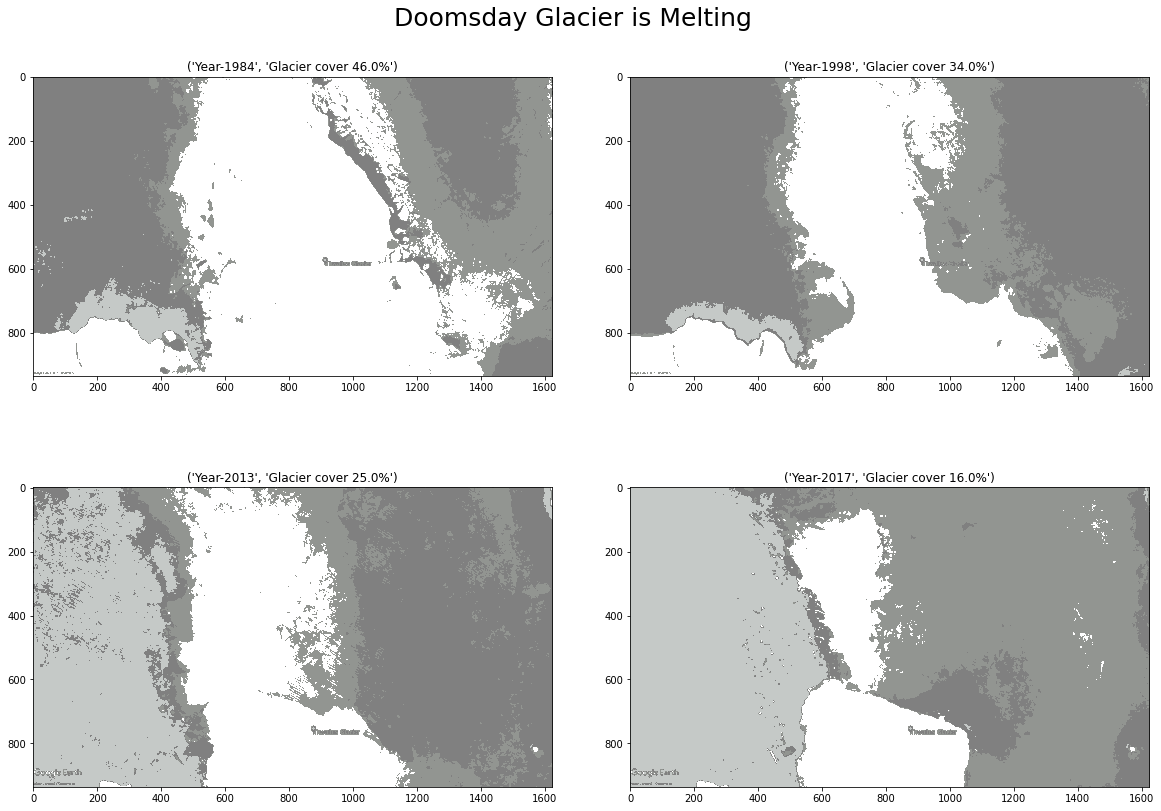

In [ ]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
fig, ax=plt.subplots(2,2,figsize=(20,20))
fig.suptitle('Doomsday Glacier is Melting', fontsize=25)
fig.subplots_adjust(hspace =0, wspace=.15,bottom=0.4,top=0.97)
ax=ax.ravel()
for i in range(len(image_name)):
    for j in range(len(glacier_cover)):
        ax[i].set_title((title[i],'Glacier cover {}%'.format(round(glacier_cover[i]*100,2))), color='black')
        ax[i].imshow(regions[i], cmap=ListedColormap(["xkcd:silver","#808080","xkcd:grey","white"]))
        
io.show()